<a href="https://colab.research.google.com/github/christine99x/MasterCourseProject/blob/main/IDL/IDL_assignment_0_group_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yuan Lin(s2945142), Xinyue Xie(s3284778)

1. Polynomial curve fitting, regularization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

1.1 generate n points(n=9,15,100) x uniformly distributed over [0,1] y = 0.5+0.4sin(2πx), y contaminated with Gaussian noise with μ=0, σ=0.05

In [ ]:
x_9_train = np.sort(np.random.uniform(0,1,9))
y_9_train = 0.5+0.4*np.sin(2*np.pi*x_9_train) + np.random.normal(0, 0, 9)

x_15_train = np.sort(np.random.uniform(0,1,15))
y_15_train = 0.5+0.4*np.sin(2*np.pi*x_15_train) + np.random.normal(0, 0, 15)

x_100_train = np.sort(np.random.uniform(0,1,100))
y_100_train = 0.5+0.4*np.sin(2*np.pi*x_100_train) + np.random.normal(0, 0, 100)

In [ ]:
x_9_test = np.random.uniform(0,1,9)
y_9_test = 0.5+0.4*np.sin(2*np.pi*x_9_test) + np.random.normal(0, 0, 9)

x_15_test = np.random.uniform(0,1,15)
y_15_test = 0.5+0.4*np.sin(2*np.pi*x_15_test) + np.random.normal(0, 0, 15)

x_100_test = np.random.uniform(0,1,100)
y_100_test = 0.5+0.4*np.sin(2*np.pi*x_100_test) + np.random.normal(0, 0, 100)

2. Find the best polynomial approximation of degree d (d = 0, 1, ..., 9) of the training set and plot the results.
3. MSE

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


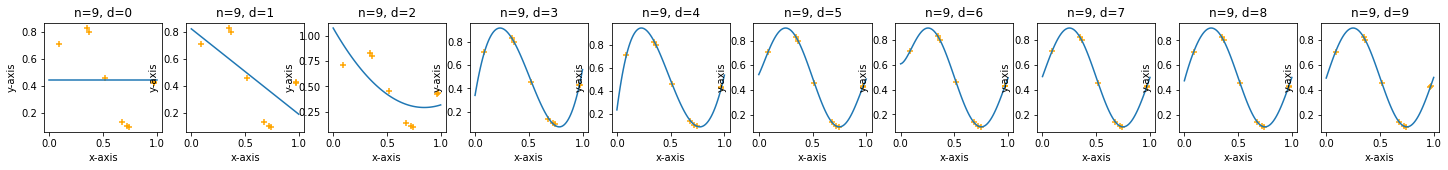

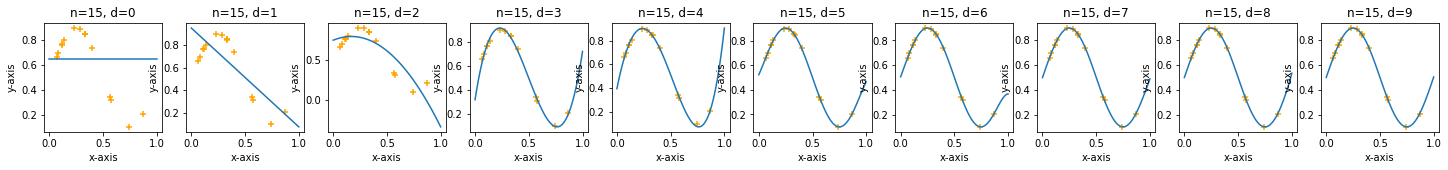

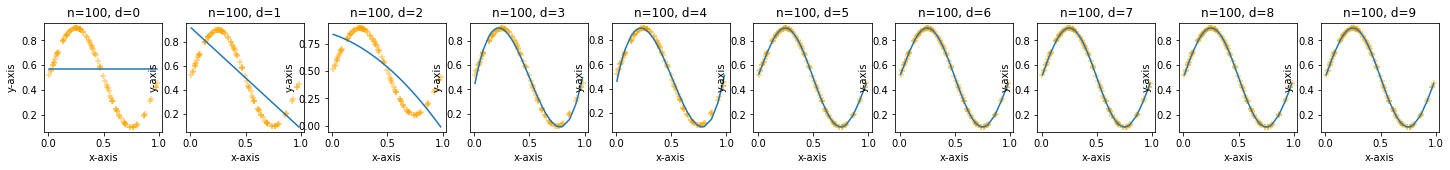

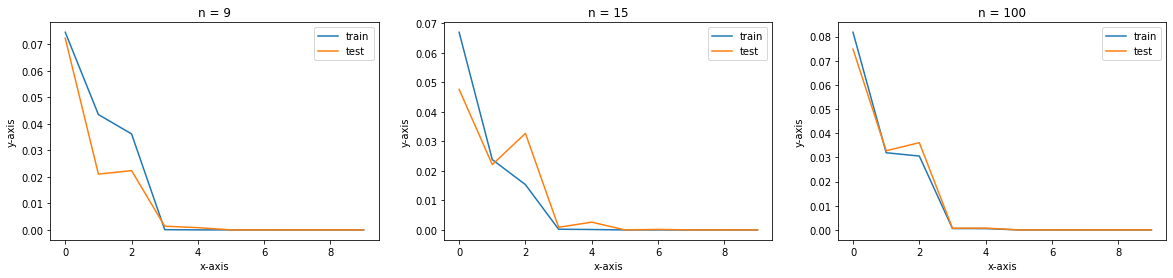

In [ ]:
m_9_test = []
m_9_train = []
m_15_test = []
m_15_train = []
m_100_test = []
m_100_train = []
for d in range(10):
  #for n=9
  plt.figure(1,figsize=(25,2))
  p_9 = np.polyfit(x_9_train, y_9_train, d)
  a = np.linspace(0,1,100)
  b = np.polyval(p_9, a)
  yvals_9_train = np.polyval(p_9, x_9_train)
  yvals_9_test = np.polyval(p_9, x_9_test)
  m_9_train.append(mean_squared_error(yvals_9_train,y_9_train))
  m_9_test.append(mean_squared_error(yvals_9_test,y_9_test))
  plt.subplot(1,10,d+1)
  plt.plot(a, b)
  plt.title("n=9, d="+str(d))
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.scatter(x_9_train, y_9_train, c='orange', marker='+')

  #for n=15
  plt.figure(2,figsize=(25,2))
  p_15 = np.polyfit(x_15_train, y_15_train, d)
  a = np.linspace(0,1,100)
  b = np.polyval(p_15, a)
  yvals_15_train = np.polyval(p_15, x_15_train)
  yvals_15_test = np.polyval(p_15, x_15_test)
  m_15_train.append(mean_squared_error(yvals_15_train,y_15_train))
  m_15_test.append(mean_squared_error(yvals_15_test,y_15_test))
  plt.subplot(1,10,d+1)
  plt.plot(a, b)
  plt.title("n=15, d="+str(d))
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.scatter(x_15_train, y_15_train, c='orange', marker='+')

  #for n=100
  plt.figure(3,figsize=(25,2))
  p_100 = np.polyfit(x_100_train, y_100_train, d)
  yvals_100_train = np.polyval(p_100, x_100_train)
  yvals_100_test = np.polyval(p_100, x_100_test)
  m_100_train.append(mean_squared_error(yvals_100_train,y_100_train))
  m_100_test.append(mean_squared_error(yvals_100_test,y_100_test))
  plt.subplot(1,10,d+1)
  plt.plot(x_100_train, yvals_100_train)
  plt.title("n=100, d="+str(d))
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.scatter(x_100_train, y_100_train, c='orange', marker='+', alpha=0.5)

plt.figure(4,figsize=(20,4))   #MSE
#n=9
plt.subplot(131)
plt.plot(m_9_train, label='train')
plt.plot(m_9_test, label='test')
plt.title("n = 9")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
#n=15
plt.subplot(132)
plt.plot(m_15_train, label='train')
plt.plot(m_15_test, label='test')
plt.title("n = 15")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
#n=100
plt.subplot(133)
plt.plot(m_100_train, label='train')
plt.plot(m_100_test, label='test')
plt.title("n = 100")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

1.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

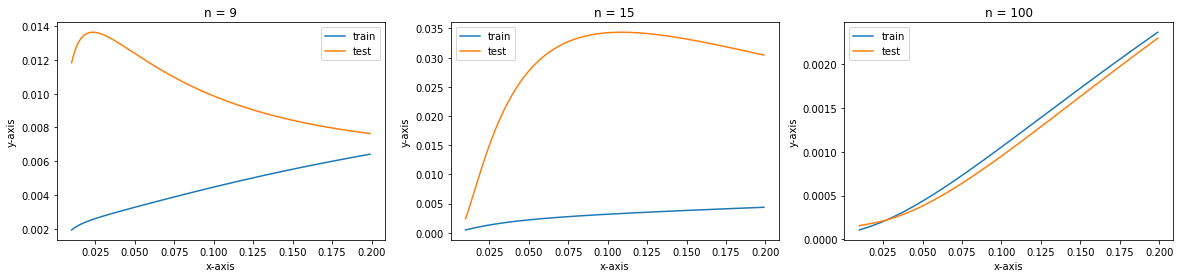

In [ ]:
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

m_9_test = []
m_9_train = []
m_15_test = []
m_15_train = []
m_100_test = []
m_100_train = []
l = np.arange(0.01,0.2,0.001)
for a in l:
  ridge1_reg = RidgeRegression(9, a)
  #n=9
  ridge1_reg.fit(x_9_train.reshape(-1,1), y_9_train)
  y_9_train_predict = ridge1_reg.predict(x_9_train.reshape(-1,1))
  y_9_test_predict = ridge1_reg.predict(x_9_test.reshape(-1,1))
  m_9_train.append(mean_squared_error(y_9_train, y_9_train_predict))
  m_9_test.append(mean_squared_error(y_9_test, y_9_test_predict))
  #n=15
  ridge1_reg.fit(x_15_train.reshape(-1,1), y_15_train)
  y_15_train_predict = ridge1_reg.predict(x_15_train.reshape(-1,1))
  y_15_test_predict = ridge1_reg.predict(x_15_test.reshape(-1,1))
  m_15_train.append(mean_squared_error(y_15_train, y_15_train_predict))
  m_15_test.append(mean_squared_error(y_15_test, y_15_test_predict))
  #n=100
  ridge1_reg.fit(x_100_train.reshape(-1,1), y_100_train)
  y_100_train_predict = ridge1_reg.predict(x_100_train.reshape(-1,1))
  y_100_test_predict = ridge1_reg.predict(x_100_test.reshape(-1,1))
  m_100_train.append(mean_squared_error(y_100_train, y_100_train_predict))
  m_100_test.append(mean_squared_error(y_100_test, y_100_test_predict))

plt.figure(figsize=(20,4))
#n=9
plt.subplot(131)
plt.plot(l, m_9_train, label='train')
plt.plot(l, m_9_test, label='test')
plt.title("n = 9")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
#n=15
plt.subplot(132)
plt.plot(l, m_15_train, label='train')
plt.plot(l, m_15_test, label='test')
plt.title("n = 15")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
#n=100
plt.subplot(133)
plt.plot(l, m_100_train, label='train')
plt.plot(l, m_100_test, label='test')
plt.title("n = 100")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()

2. High dimensional spaces

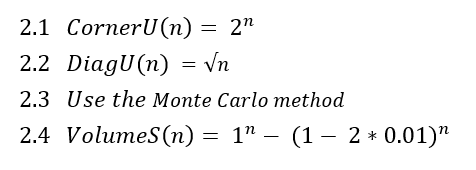

2.1~2.4

In [ ]:
for n in range(1, 101):
  s = 0
  cornerU_n = 2 ** n
  print("CornerU(" + str(n) + ") = " + str(cornerU_n))

  diagU_n = n ** 0.5
  print("DiagU("+ str(n) + ") = " + str(diagU_n))

  points = np.random.rand(1000000, n)
  center = np.zeros((1, n)) + 0.5
  for i in points:
    if np.sum((i - center) ** 2) < 0.25:
      s += 1
  volB_n = s/1000000
  print("VolB("+ str(n) + ") = " + str(volB_n))

  volS_n = 1 - 0.08 ** n
  print("VolS("+ str(n) + ") = " + str(volS_n))
  print("\n")

CornerU(1) = 2
DiagU(1) = 1.0
VolB(1) = 1.0
VolS(1) = 0.92


CornerU(2) = 4
DiagU(2) = 1.4142135623730951
VolB(2) = 0.785388
VolS(2) = 0.9936


CornerU(3) = 8
DiagU(3) = 1.7320508075688772
VolB(3) = 0.52401
VolS(3) = 0.999488


CornerU(4) = 16
DiagU(4) = 2.0
VolB(4) = 0.308013
VolS(4) = 0.99995904


CornerU(5) = 32
DiagU(5) = 2.23606797749979
VolB(5) = 0.164227
VolS(5) = 0.9999967232


CornerU(6) = 64
DiagU(6) = 2.449489742783178
VolB(6) = 0.080838
VolS(6) = 0.999999737856


CornerU(7) = 128
DiagU(7) = 2.6457513110645907
VolB(7) = 0.037082
VolS(7) = 0.99999997902848


CornerU(8) = 256
DiagU(8) = 2.8284271247461903
VolB(8) = 0.015869
VolS(8) = 0.9999999983222784


CornerU(9) = 512
DiagU(9) = 3.0
VolB(9) = 0.006489
VolS(9) = 0.9999999998657823


CornerU(10) = 1024
DiagU(10) = 3.1622776601683795
VolB(10) = 0.002537
VolS(10) = 0.9999999999892626


CornerU(11) = 2048
DiagU(11) = 3.3166247903554
VolB(11) = 0.000886
VolS(11) = 0.999999999999141


CornerU(12) = 4096
DiagU(12) = 3.4641016151377

2.5 Histogram of distance of points-pairs

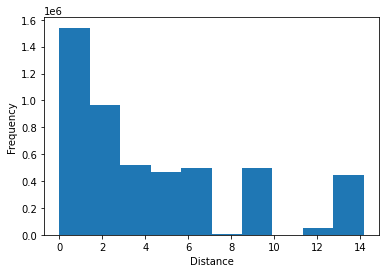

In [ ]:
x = []
distances = []
for m in range(1, 11):
  d = 0
  n = 2 ** m
  x.append(n)
  points = np.random.rand(1000, n)
  for i in range(1000):
    for j in range(i + 1, 1000):
      distances.append(np.sum((points[i] - points[j])**2) ** 0.5)

plt.hist(distances)
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()